In [11]:
import numpy as np
import matplotlib.pyplot as plt 
from random import randint

In [12]:
knapsack = 20
weights = [3,2,4,5,8,9,10,1,6,7]
benefits = [5,6,1,9,2,8,4,3,7,10]

In [13]:
def fitness_genotype(genotype,benefits,weights,knapsack):
    totalWeight = np.dot(genotype,weights)
    totalBenefits = np.dot(genotype,benefits)
    if totalWeight > knapsack:
        return 0
    else:
        return totalBenefits

In [14]:
def fitness(population,benefits,weights,popSize,knapsack):
    fitnesses = []
    for i in range(popSize):
        if np.dot(population[i],weights)>knapsack:
            fitnesses.append(0)
        else:
            fitnesses.append((np.dot(population[i],benefits)))
    return fitnesses

In [15]:
def mutation_genotype(genotype,mutation_rate):
    for i,gene in enumerate(genotype):
        n = np.random.rand()
        #print(n)
        if n <= mutation_rate:
            r = randint(0,9)
            if genotype[r] == 1:
                genotype[r] = 0
            else:
                genotype[r] = 1
    return genotype

In [16]:
population = np.random.randint(0,2,size=(200,10))

In [20]:
def optimise(gen,mutation_rate):
    maxFitness = [0]
    for i in range(gen):
        popFitness = fitness(population,benefits,weights,200,knapsack)
        randomIndex1 = randint(0,49)
        randomIndex2 = randint(0,49)
        genotype1 = population[randomIndex1]
        #print(randomIndex1)
        genotype2 = population[randomIndex2]
        #print(genotype1)
        fitnessG1 = fitness_genotype(genotype1,benefits,weights,knapsack)
        #print(fitnessG1)
        fitnessG2 = fitness_genotype(genotype2,benefits,weights,knapsack)
        #print(fitnessG2)
        if fitnessG1 > fitnessG2:
            #tempG2 = genotype2
            genotype2 = genotype1
            population[randomIndex2] = mutation_genotype(genotype2,mutation_rate)
        elif fitnessG2 > fitnessG1:
            #tempG1 = genotype1
            genotype1 = genotype2
            population[randomIndex1] = mutation_genotype(genotype1,mutation_rate)
        maxFitness.append(max(popFitness))
    return maxFitness

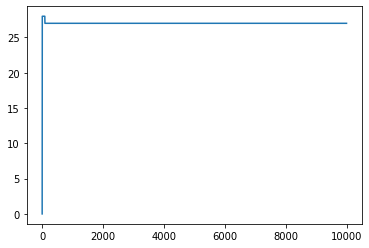

In [18]:
plt.plot(list(range(10001)),maxFitness)
plt.show()

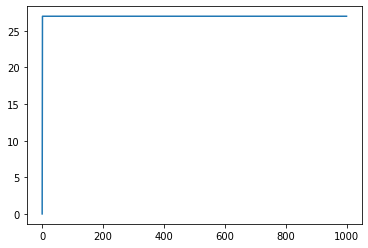

In [24]:
x=optimise(1000,0.3)
plt.plot(list(range(1001)),x)
plt.show()

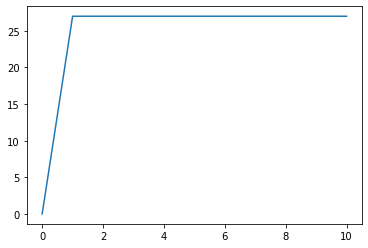

In [29]:
y=optimise(10,0.1)
plt.plot(list(range(11)),y)
plt.show()